# Project: Investigate TMDb Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this project we will introduce some data analysis for TMDb Movies dataset
> In particular we will try to answers the following questions:

>1- How is the relation between movie budget and its vote average?

>2- Which genres are most frequented from year to year?

>3- Who are the top five actors according to their movies record history before the year 2016?




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv',encoding='latin1')
print('The shape is ',df.shape)
df.head()

The shape is  (10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> some columns needs to fix their data types like release_date

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10566
cast                    10719
homepage                 2896
director                 5063
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> It is clear that the columns of budget, revenue, budget_adj, and revenue_adj has outliers of 0 values included which is not acceptable. for some cases we will use the the information of the movie except the budget and revenue so we don't need to delete the entire row. But for other case like our first question, we need to use budget value so we will neglect the movies with zero budget.

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Some columns contains missing values, according to our proposed questions some null columns won't be used in our analysis and some null columns are needed.

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> there is only one row repeated for the movie with title "TEKKEN"

### Data Cleaning

> The following dropped columns won't be used in our analysis as for proposed questions needed

In [8]:
df.drop(['imdb_id','revenue','director','homepage','tagline','keywords','overview','runtime',
         'production_companies','release_date','vote_count', 'revenue_adj'],axis=1,inplace=True)

> Removing duplicated rows as follows

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

> Adjusting or replacing the budget value with the budget_adj only if budget_adj in non zero as follows:

In [10]:
def colrep(x,y):
    if y>0:
        return y
    else:
        return x
    
df['budget']=df.apply(lambda x: colrep(x.budget, x.budget_adj), axis=1) 

> now no need for budget_adj column

In [11]:
df.drop(['budget_adj'],axis=1,inplace=True)

> Check null values again

In [12]:
df.isnull().sum()

id                 0
popularity         0
budget             0
original_title     0
cast              76
genres            23
vote_average       0
release_year       0
dtype: int64

> Both genres and cast columns still have null values so we will neglect their entire rows temporarily later

> In particular genres column will be cleaned with question 2 and cast column will be cleaned with question 3


> Describe data again

In [13]:
df.describe()

,id,popularity,budget,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,10865.000000,10865.000000
mean,66066.374413,0.646446,1.754989e+07,5.975012,2001.321859
std,92134.091971,1.000231,3.430753e+07,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,6.000000,2006.000000
75%,75612.000000,0.713857,2.085325e+07,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,9.200000,2015.000000


> budget column still has outliers with 0 values so we will neglect their rows temporarily with question 1 only

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  float64
 3   original_title  10865 non-null  object 
 4   cast            10789 non-null  object 
 5   genres          10842 non-null  object 
 6   vote_average    10865 non-null  float64
 7   release_year    10865 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 763.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis




> Exploring the distribution of data

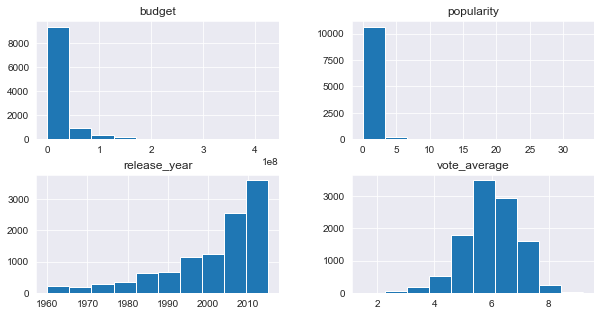

In [15]:
df.iloc[:,1:].hist(figsize=(10,5));

> Budget data is right skewed

> release_year is left skewed

> Watching the growth of movie production

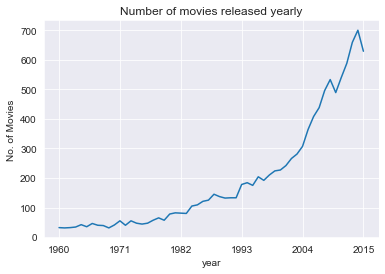

In [16]:
movyear=df.groupby('release_year').size()
plt.plot(movyear)
plt.xlabel('year')
plt.ylabel('No. of Movies')
plt.title('Number of movies released yearly')
plt.xticks(np.linspace(1960,2015,6));

> The above line chart shows that the number of yearly released movies increases year after year

> watching the trend of movies mean popularity over the time

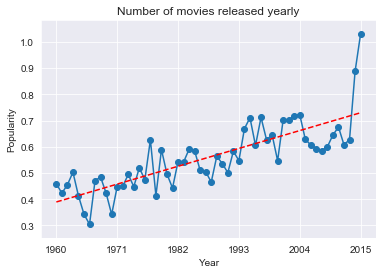

In [17]:

popdf=df.groupby('release_year').popularity.mean()
plt.scatter(popdf.index,popdf.values)
plt.plot(popdf.index,popdf.values)

z = np.polyfit(popdf.index,popdf.values, 1)
p = np.poly1d(z)
plt.plot(popdf.index,p(popdf.index),"r--")


plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Number of movies released yearly')
plt.xticks(np.linspace(1960,2015,6));

> The above scatter plot shows there is a positive correlation between the yearly popularity average and its released year


### Research Question 1:  How is the relation between movie budget and its vote average?
> For some movies budget value equal to 0 which will lead to wrong judgement so we will delete temporarily all movies that has 0 budget

In [18]:
dftemp=df[df.budget!=0].copy()
dftemp.budget/=1000000
dftemp.head()

,id,popularity,budget,original_title,cast,genres,vote_average,release_year
0,135397,32.985763,137.999939,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,137.999939,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,101.199956,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,183.999919,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,174.799923,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,7.3,2015


In [19]:
# categorized the vote rate level into high and low rates
rate_edge=[dftemp.vote_average.quantile(i/2) for i in range(3)]
rate_edge[0]=rate_edge[0]
dftemp['rate_level']=pd.cut(dftemp['vote_average'], rate_edge, labels=['low','high'])
dftemp.rate_level.fillna('low',inplace=True)
# group budget mean by two level of vote rate
mean_rate=dftemp.groupby('rate_level').budget.mean()
mean_rate

rate_level
low     34.68821
high    39.35826
Name: budget, dtype: float64

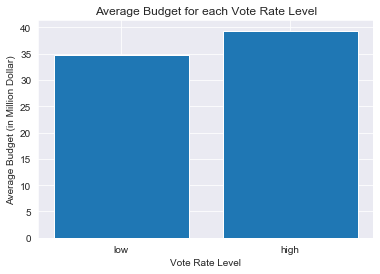

In [20]:
# Bar graph for the mean budget of each rate vote category
plt.bar(mean_rate.index, mean_rate)
plt.title('Average Budget for each Vote Rate Level')
plt.xlabel('Vote Rate Level')
plt.ylabel('Average Budget (in Million Dollar)');

### Analysis for question 1: How is the relation between movie budget and its vote average?
> We notice that as the movie budget increase, the vote rate level may be increased

### Research Question 2: Which genres are most frequented from year to year?

> As mentioned before the genres column has null values so we will neglect their entire rows temporarily here

In [21]:
dftemp=df[df.genres.notnull()].copy()

> We need to split every movie genres and group by each year into a new dataframe

In [22]:
genredf=pd.DataFrame({'Action':0},index=[2015]) 
def addtodf(df0,genrename,year):
  
    if genrename not in df0.columns:
        df0.insert(df0.shape[1],genrename,np.repeat(0, df0.shape[0]))
    if year not in df0.index:
        a_row={}
        for i in df0.columns:
            a_row[i]=0
        df1 = pd.DataFrame(a_row,index = [year])
        df0=df0.append(df1)
    df0.loc[year,genrename]+=1
    return df0

for i in dftemp.index:
    for genrename in dftemp.genres[i].split('|'):
        genredf=addtodf(genredf,genrename,dftemp.release_year[i])
genredf.sort_index(inplace=True)
genredf['Max'] = genredf.idxmax(axis=1)
genredf.head()

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,...,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign,Max
1960,8,5,3,6,2,2,6,13,3,0,...,0,6,2,5,1,7,0,0,1,Drama
1961,7,6,4,0,2,2,3,16,5,1,...,1,7,2,3,2,3,0,0,1,Drama
1962,8,7,2,7,1,3,3,21,2,0,...,4,5,3,4,1,5,0,0,1,Drama
1963,4,7,2,10,2,4,2,13,3,1,...,6,8,1,4,0,9,0,0,2,Drama
1964,5,5,4,9,4,10,1,20,4,2,...,4,9,3,3,5,6,0,0,1,Drama


> Next, we want to find the yearly most frequented genres for all given years

In [23]:
 
print(genredf['Max'].unique())

['Drama' 'Comedy']


In [24]:
drama_df=genredf.loc[:,'Drama']
comedy_df=genredf.loc[:,'Comedy']

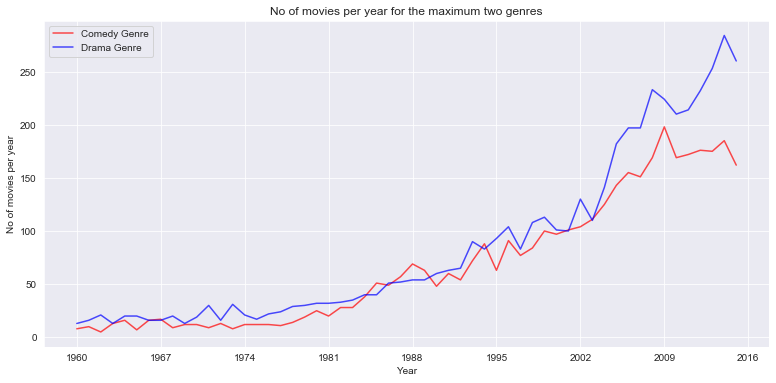

In [25]:
plt.figure(figsize=(13,6))
comedy_line = plt.plot(comedy_df, color='r', alpha=.7, label='Comedy Genre')
drama_line = plt.plot(drama_df, color='b', alpha=.7, label='Drama Genre')
plt.ylabel('No of movies per year')
plt.xlabel('Year')
plt.title('No of movies per year for the maximum two genres')
plt.xticks(np.linspace(1960,2016,9))
plt.legend();

### Analysis for question 2: Which genres are most frequented from year to year?
> We notice that the yearly number of drama movies is more than the yearly number of comedy movies for most of time

> but also we notice that the yearly comedy movies highly exceeded the yearly number of comedy movies near the year 1988

### Research Question 3: Who are the top five actors according to their movies record history before the year 2016?

> As mentioned before the cast column has null values so we will neglect their entire rows temporarily here

In [26]:
dftemp=df[df.cast.notnull()].copy()

> We need to split every movie cast to group by each actor ranked with his accumulated vote, movies count, accumulated popularity into a new dataframe

In [27]:
actdf=pd.DataFrame({'vote':0,'movies_count':0,'popularity':0},index=['Chris Pratt']) 

def addtodf(df0,actname,vote,popularity):
  
    if actname not in df0.index:
        newdf = pd.DataFrame({'vote':0,'movies_count':0,'popularity':0},index=[actname])
        df0=df0.append(newdf)
        
    df0.loc[actname,:]+=[vote,1,popularity]
    return df0
   
for i in dftemp.index:
    for actname in dftemp.cast[i].split('|'):
        actdf=addtodf(actdf,actname,dftemp.vote_average[i],dftemp.popularity[i])
actdf

,vote,movies_count,popularity
Chris Pratt,61.3,10.0,55.947194
Bryce Dallas Howard,45.1,7.0,41.137539
Irrfan Khan,40.4,6.0,37.270596
Vincent D'Onofrio,149.8,24.0,50.235134
Nick Robinson,30.5,5.0,34.414861
...,...,...,...
Harold P. Warren,1.5,1.0,0.035919
Tom Neyman,1.5,1.0,0.035919
John Reynolds,1.5,1.0,0.035919
Diane Mahree,1.5,1.0,0.035919


In [28]:
actdf.index.name='actor'
actdf.to_csv('Actors_Votes.csv')

In [29]:
actdf=pd.read_csv('Actors_Votes.csv',index_col='actor')

In [30]:
actdf.head()

,vote,movies_count,popularity
actor,,,
Chris Pratt,61.3,10.0,55.947194
Bryce Dallas Howard,45.1,7.0,41.137539
Irrfan Khan,40.4,6.0,37.270596
Vincent D'Onofrio,149.8,24.0,50.235134
Nick Robinson,30.5,5.0,34.414861


In [31]:
top5=actdf.nlargest(5, ['vote'])
top5

,vote,movies_count,popularity
actor,,,
Robert De Niro,455.8,72.0,78.091718
Samuel L. Jackson,432.4,71.0,94.612089
Bruce Willis,366.0,62.0,77.460368
Nicolas Cage,352.4,61.0,60.375777
Michael Caine,336.6,53.0,83.406456


> In order to compare among the top 5 actors, we have three dimensions (Accumulated Vote, Movies Count, Accumulated Popularity).

> we need to put all three dimensions on one bar graph but they are in different scale unit.

> we can unify the scale unit to be relative to the top actor who is 'Robert De Niro'

In [32]:
top5/=top5.iloc[0,:]

In [33]:
top5*=100

In [34]:
top5

,vote,movies_count,popularity
actor,,,
Robert De Niro,100.000000,100.000000,100.000000
Samuel L. Jackson,94.866169,98.611111,121.155087
Bruce Willis,80.298376,86.111111,99.191528
Nicolas Cage,77.314612,84.722222,77.313931
Michael Caine,73.848179,73.611111,106.805764


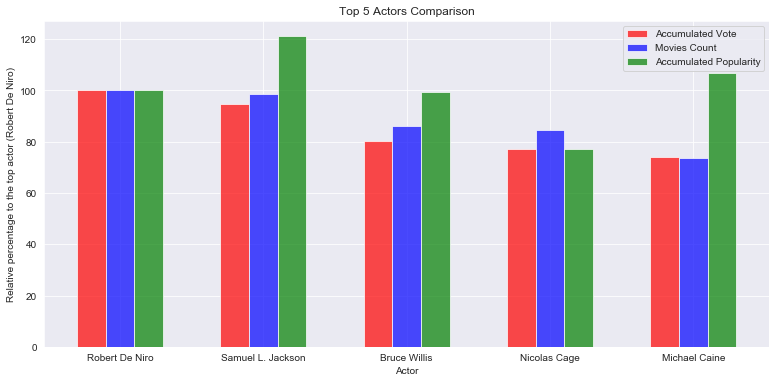

In [35]:
ind = np.arange(5)  # the x locations for the groups
width = 0.2       # the width of the bars
ind
plt.figure(figsize=(13,6))
votebar = plt.bar(ind, top5['vote'], width, color='r', alpha=.7, label='Accumulated Vote')
movies_countbar = plt.bar(ind + width, top5['movies_count'], width, color='b', alpha=.7, label='Movies Count')
popularitybar= plt.bar(ind + 2*width, top5['popularity'], width, color='g', alpha=.7, label='Accumulated Popularity')

# title and labels
plt.ylabel('Relative percentage to the top actor (Robert De Niro)')
plt.xlabel('Actor')
plt.title('Top 5 Actors Comparison')

locations = ind + width  # xtick locations
labels = top5.index  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()
plt.show()

### Analysis for question 3: Who are the top five actors according to their movies record history before the year 2016?
> we notice that Robert De Niro is superior in both accumulated vote and movies count.

> but also we notice that both of Samuel L. Jackson and Michael Caine has a much more Accumulated popularity of their movies than Robert De Niro.

<a id='conclusions'></a>
## Conclusions
> In this report I analyzed the given data of Western movies over the decades. I made my analysis based on 'budget', 'popularity', 'release_year', 'vote_average', 'cast', and 'genres'


> I found a positive correlation between the yearly number of released movies and its released year. 

> I couldn't find out a relation between 'popularity' and 'release_year'. but when I found out a positive correlation relation between the mean values of 'popularity' grouped by 'released year'.

> After that I analyzed the ratings of the most and least expensive movies and I found out that the more expensive movies got higher votes than the cheaper ones. 


> Next, I worked hard to split the genres column and create another dataset at which I found that both drama and comedy genres are the most popular over the time


> Finally, I worked again to split the cast column and create another dataset at which all actors ranked according to their accumulated vote, movies count, and sccumulated Popularity which leads us to extract the top five actors.




## Limitations
> Our analysis is limited to only the provided dataset. For example:

> 1- There are outliers in both 'budget' and 'revenue' columns which may affect the skewness of data.

> 2- Both 'budget_adj' and 'revenue_adj' columns may be calculated using exchange rate or currency conversion but it would be good if the exchange rate is included within the dataset

> 3- With 'popularity' column, It would be good to know more about what is behind the value 'popularity' and what popularity means here. How was it calculated? Which criterias and values were measured exactly to get these numbers?.


> 3- Dropping missing or Null values from variables like 'cast', 'director', 'genres' of our interest might skew our analysis and could be misleading us
